# Lecture Note: Linear Regression

## By Albert S. (Pete) Kyle

## BUFN400 Fall 2022---University of Maryland 

$\def \sm {} \renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\def \mm {} \renewcommand{\mm}{{\scriptsize @}}$
$\def \E {} \renewcommand{\E}{\mathrm{E}}$
$\def \e {} \renewcommand{\e}{\mathrm{e}}$
$\def \drm {} \renewcommand{\drm}{\mathrm{\, d}}$
$\def \var {} \renewcommand{\var}{\mathrm{var}}$
$\def \cov {} \renewcommand{\cov}{\mathrm{cov}}$
$\def \corr {} \renewcommand{\corr}{\mathrm{corr}}$
$\def \stdev {} \renewcommand{\stdev}{\mathrm{stdev}}$
$\def \t {} \renewcommand{\t}{^{\mathsf{T}}}$
$\def \comma {} \renewcommand{\comma}{\, , \,}$
$\def \vec {} \renewcommand{\vec}[1]{ \mathbf{#1}}$
$\def \skew {} \renewcommand{\skew}{\mathrm{skew}}$
$\def \kurt {} \renewcommand{\kurt}{\mathrm{kurt}}$
$\def \prob {} \renewcommand{\prob}{\textrm{prob}}$
$\def \midx {} \renewcommand{\midx}{\, \mid \,}$


In [1]:
import numpy as np
import numpy.linalg
import scipy
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt

import sys
import datetime
import timeit

print('Python version ' + sys.version)
# print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()



Python version 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
NumPy version 1.26.4
SciPy version 1.12.0
matplotlib version 3.8.3
Timestamp: 2024-1023-1148


# Ordinary Least Squares (OLS) regression

Let $\vec{X}$ denote an $n \times m$ matrix representing $n$ observations on $m$ variables. Let $\vec{y}$ denote a vector representing observations of the variable to be explained. Let $\pmb{\epsilon}$ denote a vector of identically and independently distributed errors. Hypothesize the theoretical model

$$
 \vec{y} = \vec{X} \mm \vec{b} + \pmb{\epsilon},
$$

where $\vec{b}$ is an $m \times 1$ vector of true (but unknown) regression coefficients. A constant term in the model is represented by a column on ones in the matrix $\vec{X}$.

The OLS regression coefficients which estimate $\vec{b}$ are defined as the vector $\hat{ \vec{b}}$ which minimizes the sum of squared errors

$$
( \vec{y} - \vec{X} \mm \hat{ \vec{b}}) \t \mm ( \vec{y} - \vec{X} \mm \hat{ \vec{b}}).
$$

The first-order conditions for this **quadratic optimization problem** are

$$
( \vec{y} - \vec{X} \mm \hat{ \vec{b}}) \t \mm \vec{X} = \vec{0}.
$$

Geometrically, the first-order conditions say that the errors $\vec{y} - \vec{X} \mm \hat{ \vec{b}}$ are **orthogonal** (perpendicular) to each of the colums of $\vec{X}$, which is equivalent to their inner product being zero.

The first-order conditions can be expressed as the **normal equations**

$$
 \vec{X} \t \mm \vec{X} \mm \hat{ \vec{b}} = \vec{X} \t \mm \vec{y}.
$$

If the matrix $\vec{X} \t \mm \vec{X}$ is invertible, the solution can be formally expressed as

$$
\hat{ \vec{b}} = ( \vec{X} \t \mm \vec{X})^{-1} \mm \vec{X} \t \mm \vec{y}.
$$

In practical applications, calculating the OLS regression coefficients using this formula (first calculate the **gram matrix** $\vec{X} \t \mm \vec{X}$, then calculate its inverse $( \vec{X} \t \mm \vec{X})^{-1}$, then matrix-multiply by $\vec{X} \t \mm \vec{y}$) is computationally both slow and inefficient. Both calculating $( \vec{X} \t \mm \vec{X})^{-1}$ and calculating the inverse are **n-cubed** algorithms in the sense that doubling both $n$ and $m$ increases the number of computations required by a factor of about 8. 

In many problems, numerical error makes calculating the inverse a bad idea.

Instead of calculating the inverse, OLS algorithms use matrix decompositions. 



# OLS example with one explanatory variable plus constant term

Let us first illustrate OLS regression with a simple example having one explanatory variable and a constant term. This gives us two explanatory variables.

This problem is so simple that the solution can be calculated by hand and easily plotted.

r2=0.9855545024965012
Should be numerically zero: residuals - (errors**2).sum()=array([-9.09494702e-13])
coeffs=array([-0.02094182,  1.51095909])
residuals=array([4255.21433791])
rank=2
singular_values=array([358.11634987,  14.0262358 ])
condition_number=0.039166700455593464
Forecast errors are orthogonal to xx (normal equations): xx.T @ errors=array([-1.18340893e-11, -1.46798129e-10])


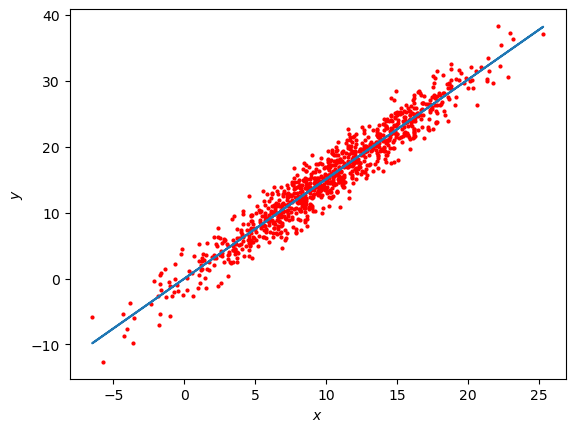

In [2]:
# Values of exogenous true parameters:

n = 1000
a = 0.1000
b = 1.50
sigma = 2.00

meanx = 10.00
stdx = 5.00

# Simulate vectors y and x of length n:

rng = np.random.default_rng(123)
x = meanx + stdx * rng.standard_normal(n)
z = rng.standard_normal(n)
c = np.ones_like(x)
y = a + b * x + sigma * z

# Calculate linear regression:
xx = np.vstack([c, x]).T
coeffs, residuals, rank, singular_values = np.linalg.lstsq(xx, y, rcond=None)

# Calculate predicted values, residuals, and r-squared
yhat = xx @ coeffs  # predicted values
errors = y - yhat  # residuals
r2 = (yhat * yhat).sum() / (y * y).sum()
condition_number = singular_values.min() / singular_values.max()

print(f"{r2=}")
print(f"Should be numerically zero: {residuals - (errors**2).sum()=}")

print(f"{coeffs=}")
print(f"{residuals=}")
print(f"{rank=}")
print(f"{singular_values=}")
print(f"{condition_number=}")
print(f"Forecast errors are orthogonal to xx (normal equations): {xx.T @ errors=}")

plt.plot(x, y, 'ro', markersize=2.00)
plt.plot(x, yhat)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()


Confirm simple OLS calculations by hand:

In [3]:
ahat = coeffs[0]
bhat = coeffs[1]

bhat2 = (y @ (x - x.mean())) / (x @ (x - x.mean()))
ahat2 = y.mean() - bhat2 * x.mean()
yhat2 = ahat2 + bhat2 * x

print(f"Should be numerically zero: {ahat - ahat2=}")
print(f"Should be numerically zero: {bhat - bhat2=}")
print(f"Should be numerically zero: {np.linalg.norm(yhat - yhat2, ord=np.inf)=}")

print("\nCondition number much greater than 1 indicates multicollinearity.")
print("Three ways to calculate condition number:")
print(f"Condition number = {singular_values.max() / singular_values.min()=}")
print(f"Condition number = {np.linalg.cond(xx)=}")
print("NB: Squaring matrix increases numerical error:")
print(f"Condition number = {np.sqrt(np.linalg.cond(xx.T @ xx, p='fro'))=}\n")


Should be numerically zero: ahat - ahat2=-3.590877595271991e-15
Should be numerically zero: bhat - bhat2=1.3322676295501878e-15
Should be numerically zero: np.linalg.norm(yhat - yhat2, ord=np.inf)=2.842170943040401e-14

Condition number much greater than 1 indicates multicollinearity.
Three ways to calculate condition number:
Condition number = singular_values.max() / singular_values.min()=25.531892867355083
Condition number = np.linalg.cond(xx)=25.531892867355094
NB: Squaring matrix increases numerical error:
Condition number = np.sqrt(np.linalg.cond(xx.T @ xx, p='fro'))=25.53192290879246



# OLS and matrix decompositions

Several matrix decompositions are related to algorithms for calculating OLS regression coefficients. These include:

1. **Singular value decomposition**.

2. **QR decomposition**.

3. **Cholesky decomposition**.

Recent years have seen a great deal of research concerning efficient numerical algorithms for calculating singular value decompositions and QR decompositions.  As **Moore's Law** makes calculations with large matrices more feasible, interest has increased in optimizing algorithms for dealing with very large matrices of different shapes. An important issue concerns when and if computations can be parallelized, such as with "divide and conquer" algorithms.

# Singular value decomposition

Every matrix $\vec{X}$ has a **singular value decomposition** of the form $\vec{X} = \vec{U} \mm \vec{D} \mm \vec{V} \t $, where $\vec{U}$ and $\vec{V}$ are $n \times m$ **orthonormal matrices** (all $m$ columns orthogonal with **L2 norm** equal to one), and $\vec{D}$ is a $m \times m$ diagonal matrix of nonnegative **singular values** $(d_1,...,d_m)$. The singular values are usually sorted from largest to smallest.  If some of the singular values are theoretically zero (i.e., zero in exact arithmetic), the matrix $\vec{X}$ is theoretically singular, and these singular values can be deleted, along with the corresponding columns of $\vec{U}$ and $\vec{V}$. The singular values are theoretically unique. If the singular values are theoretically all different, the matrices $\vec{U}$ and $\vec{V}$ are also unique. Otherwise, there is some lack of uniqueness among columns corrresponding to identical singular values.

In practice, if $\vec{X}$ is invertible (which implies it is square): 

1. Some theoretically singular matrices are numerically invertible and have very tiny singualar values representing numerical error.

2. Some theoretically invertible matrices are numerically almost singular and also have very small singular values. 

In applications, including finance, it is typical to delete very small singular values, along with the corresponding columns of $\vec{U}$ and $\vec{V}$, then treat $\vec{X}$ as a matrix of rank $m - k$, where $k$ is the number of singular values deleted. An important practical issue is to determine how small a singular value must be before deleting it.

If the singular value decomposition of $\vec{X}$ is known, it is easy to calculate the OLS coefficients as

$$
\begin{aligned}
\hat{ \vec{b}} &= ( \vec{X} \t \mm \vec{X})^{-1} \mm \vec{X} \t \mm \vec{y} \\
&= ( \vec{V} \mm \vec{D} \mm \vec{U} \t \mm  \vec{U \mm} \vec{D} \mm \vec{V} \t \mm )^{-1} \mm \vec{V} \mm \vec{D} \mm \vec{U} \t \mm \vec{y} \\
&= \vec{V} \mm \vec{D}^{-1} \mm \vec{U} \t \mm  \: \vec{U} \mm \vec{D}^{-1} \mm \vec{V} \t \mm  \: \vec{V} \mm \vec{D} \mm \vec{U} \t \mm \vec{y} \\
&= \vec{V} \t \mm \vec{D}^{-1} \mm \vec{U}  \mm \vec{y}. \\
\end{aligned}
$$

The **condition number** of a matrix is the ratio of the largest to the smallest singular value. The condition number of the identity matrix is (obviously) one.  If the matrix is singular, one of the singular values is zero, so the condition number is infinite (or undefined). If a matrix has a very large condition number, then it is "almost" singular. 

If some of the columns of $\vec{X}$ are highly correlated with linear combinations of other columns, then the condition number of $\vec{X}$ will be large; the OLS regression problem will suffer from **multicollinearity**. Multicollinearity implies that the estimated parameters $\hat{ \vec{b}}$ may be inaccurate estimates of the true parameters $\vec{b}$.

The singular value decomposition works even when the matrix $\vec{X}$ is singular. When the matrix is singular and singular values equal to zero are deleted, the singular value decomposition can be used to define a **pseudo-inverse** $\vec{V} \t \mm \vec{D}^{-1} \mm \vec{U}$, which has many properties of an inverse. Similarly, when small singular values are deleted, the result is a matrix which approximates the the inverse of $\vec{X}$. 

Even though the singular value decomposition is used to solve the normal equations $\vec{X} \t \mm \vec{X} = \vec{X} \t \mm \vec{y}$, the singular value decomposition of the matrix $\vec{X}$ is used, not the singular value decomposition of the gram matrix $\vec{X} \t \mm \vec{X}$. This is because (1) there is more numerical error using the singular value decomposition of $\vec{X} \t \mm \vec{X}$ than $\vec{X}$, and (2) calculation of $\vec{X} \t \mm \vec{X}$ is computationally expensive.

Compared to other matrix decompositions used to solve OLS problems, singular value decomposition is numerically more stable and accurate, but it is slower.  

The numpy function `np.lstsq()` seems to use singular value decomposition; the parameter `rcond` deals with multicollinearity by defining the cutoff for deleting small singular values.




### Exercise for self-study

1. Review basic matrix algebra concepts to verify the sequence of equalities in the equation above.

2. Verify that it takes $n \sm m \sm k$ floating point multiplication operations to multiply an $n \times m$ matrix by an $m \times k$ matrix.

3. Explain why the calculation in the equation above should be implemented as $\vec{V} \t \mm  ( \vec{D}^{-1}v \mm ( \vec{U} \mm \vec{y}))$, not $(( \vec{V} \t \mm \vec{D}^{-1}) \mm \vec{U}) \mm \vec{y}$.

4.  In the regression example above, change the parameters `meanx` and `stdx` so that `meanx` is large relative to `stdx`. Verify that the condition number becomes smaller, and at least one of the estimated parameters becomes less accurate. (NB: You do not have to do a formal test for this, but you may want to change the seed to produce different outcomes.)

5. Convince yourself that multicollinearity creates both **numerical error** and **statistical error** for estimating paramters. Explain why statistical error may typically be a bigger problem in practice.

# QR Decomposition

Every matrix $\vec{X}$ has a **QR decomposition** of the form $\vec{X} = \vec{Q} \mm \vec{R}$, where $\vec{Q}$ is an **orthogonal matrix** (orthogonal columns, each with Euclidean norm of 1) and $\vec{R}$ is a **right triangular matrix**, also called **upper triangular matrix** (all entries to the left of the diagonal---equivalently below the diagonal---are zero). Theoreticallly, $\vec{Q}$ is $n \times n$ and $\vec{R}$ is $n \times m$; by rearranging columns and deleting rows or columns of zeros, it can be assumed that $\vec{Q}$ is $n \times m$ and $\vec{R}$ is $m \times m$.

Let $\vec{X} = \vec{Q} \mm \vec{R}$ be a QR decomposition of $\vec{X}$.
The normal equations $\vec{X} \t \mm \vec{X} \mm \hat{ \vec{b}} = \vec{X} \t \mm \vec{y}$ can be written

$$
 \vec{R} \t \mm \vec{Q} \t \mm \vec{Q} \mm \vec{R}  \mm\hat{ \vec{b}}
= \vec{R} \t \mm \vec{Q} \t \mm \vec{y}.
$$

Using $\vec{Q} \t \mm \vec{Q} = \vec{I}$, this equation is equivalent to

$$
 \vec{R} \t \mm \vec{R} \mm \hat{ \vec{b}}
= \vec{R} \t \mm \vec{Q} \t \mm  \vec{y},
$$

which is solved by the solution to

$$
 \vec{R} \mm \hat{ \vec{b}} = \vec{Q} \t \mm  \vec{y}.
$$

Since $\vec{R}$ is triangular, there are computationally efficient and accurate ways to solve $\vec{R} \mm \hat{ \vec{b}} = \vec{Q} \t \mm  \vec{y}$ for $\hat{ \vec{b}}$ using **backsubstitution**.

Using the QR decomposition to solve least squares problems is faster than using singular value decomposition. It is usually numerically stable and accurate, but it may not work well if the matrix $\vec{X}$ does not have full rank.

The scipy function `scipy.lstsq()` has more refined options than `np.lstsq()`, including `lapack_driver='gelsd'` for singular value decomposition and `lapack_driver='gelsy'` for QR decomposition. 

Background: Numpy and Scipy use BLAS and LAPACK to implement optimized algorithms for element-by-element (U-function) operations and linear algebra functions on arrays.  Numpy and Scipy typically implement BLAS and LAPACK functions with specialized optimized libraries such as MKL or OpenBlas. The specialized libraries can use multiple processors even when Numpy and Scipy do not. Many of the specialized functions are in the modules `np.linalg` and `scipy.linalg`.


# Cholesky decomposition

Any **symmetric positive definite $m \times m$ matrix** $\vec{A}$ has a unique **Cholesky decomposition** of the form $\vec{A} = \vec{L} \mm \vec{L} \t$, where $\vec{L}$ is a **lower triangular matrix** (entries above the diagonal equal to zero) with positive diagonal entries.

If the $n \times m$ matrix $\vec{X}$ has full rank $m$, then the gram matrix $\vec{X} \t \mm \vec{X}$ is symmetric and positive definite and therefore has a Cholesky decomposition $\vec{X} \t \mm \vec{X} = \vec{L} \mm \vec{L} \t $.  The normal equations $\vec{X} \t \mm \vec{X} \mm \hat{ \vec{b}} = \vec{X} \t \mm \vec{y}$ can be written

$$
 \vec{L} \mm \vec{L} \t \mm  \hat{ \vec{b}} = \vec{X} \t \mm \vec{y}.
$$

It is computationally fast to solve for $\hat{ \vec{b}}$ using **forward substitution**, then **back substitution**.

The Cholesky decomposition is a version of the LU decomposition. The Cholesky decomposition is about twice as fast as LU decomposition becasue it exploits the symmetry of the matrix $\vec{X} \mm \vec{X}$. It is quite a bit faster than QR decomposition and singular value decomposition.

If the condition number of $\vec{X} \t \mm \vec{X}$ is not too bad, then Cholesky decomposition is also numerically stable and accurate.

If the matrix $\vec{X} \t \mm \vec{X}$ is already known and the condition number of $\vec{X} \t \mm \vec{X}$ is not too bad, Cholesky decomposition is a good choice for solving least squares problems when speed is important. If $\vec{X} \t \mm \vec{X}$ must be calculated from $\vec{X}$ by matrix multiplication, the Cholesky decomposition is less advantageous because (1) calculation of the gram matrix $\vec{X} \t \mm \vec{X}$ is slow, and (2) the condition number of the matrix $\vec{X} \t \mm \vec{X}$ is the square of the condition number for $\vec{X}$.

Cholesky decomposition is a variation on LU decomposition. LU decomposition can be used to solve nonsingular but not symmetric and positive definite systems of equations. The function np.solve() uses LU decomposition.  The function `scipy.linalg.solve()` has options such as `assume_a='pos'` for a positive definite system. If $\vec{A} = \vec{X} \t \mm \vec{X}$ and $\vec{b} = \vec{X} \t \mm \vec{y}$, then `scipy.solve(A, b, assume_a='pos")` uses a Cholesky decomposition to solve $\vec{A} \mm \vec{x} = \vec{b}$.

My recommendation is to use a Cholesky decomposition when the matrix $\vec{X} \t \mm \vec{X}$ is given and need not be calculated and also the matrix $\vec{X} \t \mm \vec{X}$ is known not to be too ill conditioned.  Otherwise, I recommend a singular value decomposition. The QR decomposition should be reserved for cases where $\vec{X} \t \mm \vec{X}$ is not numerically close to being singular and computation speed is particularly important.

# Example of a linear regression

The following example of linear regression has multiple explanatory variables but no constant term.

In [4]:
# Values of exogenous true parameters:

rng = np.random.default_rng(123)

n = 100
m = 10
sigma = 0.10

b = rng.standard_normal(m)
x = rng.standard_normal((n, m))
z = sigma * rng.standard_normal(n)
y = x @ b + sigma * z

# Calculate linear regression using numpy svd:
coeffs, residuals, rank, singular_values = np.linalg.lstsq(x, y, rcond=None)

# Calculate linear regression using scipy svd:
coeffs_svd, residuals_svd, rank_svd, singular_values_svd = scipy.linalg.lstsq(x, y, 
                                            cond=None, lapack_driver='gelsd')
# Calculate linear regression using scipy qr:
coeffs_qr, residuals_qr, rank_qr, singular_values_qr = scipy.linalg.lstsq(x, y, 
                                            cond=None, lapack_driver='gelsy')

# Calculate linear regression using scipy cholesky:
xx = x.T @ x
xy = x.T @ y
coeffs_chol = np.linalg.lstsq(xx, xy, rcond=None)[0]

print("The following should be numerically zero if algos give same result:")
print(f"{np.linalg.norm(coeffs - coeffs_svd, ord=1)=}")
print(f"{np.linalg.norm(coeffs - coeffs_qr, ord=1)=}")
print(f"{np.linalg.norm(coeffs - coeffs_chol, ord=1)=}")


The following should be numerically zero if algos give same result:
np.linalg.norm(coeffs - coeffs_svd, ord=1)=0.0
np.linalg.norm(coeffs - coeffs_qr, ord=1)=6.217248937900877e-15
np.linalg.norm(coeffs - coeffs_chol, ord=1)=7.66053886991358e-15


### Problem for self-study

1. Look at the code above to make sure you understand how it works. (Please correct my errors!)

2. Time the code for problems of different sizes to determine when it might be appropriate to use one algorithm or the other. How does the efficiency of the Cholesky decomposition depend on whether the gram matrix `x.T @ x` must be calculated anyway?

3. (Advanced, optional) Modify the problem to make it poorly conditioned. Then see whether SVD does a better job than QR or Cholesky for solving it.

# Uses of linear regression in finance

Linear regression has many direct uses in finance, including:

1. Modeling the covariance structure of returns on different securities.

2. Predicting future security returns given signals based on available information.

3. Fitting shapes to yield curves.

Linear regression also has indirect uses in simulation and optimization.  For example, when optimizing a concave or convex objective function of many parameters, a standard solution strategy is an interative method which approximates the objective function with a quadratic function, then solves the first-order conditions for this quadratic approximation. These first-order conditions can be thought of as a least squares problem, which must be solved once on each iteration.

I will illustrate how to model the contemporaneous relationship between a simulated stock and simulated stock index.

# "Alpha" and "Beta"

Consider two assets ("market" and "asset") with gross returns $R_m(t, t + \Delta t)$ and $R_a(t, t + \Delta t)$, with $R_f(t, t + \Delta t) = \mathrm{e}^{r_f \sm \Delta t}$ .

The assets have an approximate linear regression relationship

$$
\frac{R_a(t, t + \Delta t)}{R_f(t, t + \Delta t)} = \alpha + \beta \sm \frac{R_m(t, t + \Delta t)}{R_f(t, t + \Delta t)} + \epsilon(t, t + \Delta t).
$$

If $r_m(t, t + \Delta t) = R_m(t, t + \Delta t) -1$ and $r_a(t, t + \Delta t) = R_a(t, t + \Delta t) -1$, the above equation can be written approximatelly as

$$
r_a(t, t + \Delta t) - r_f(t, t + \Delta t) = \alpha + \beta \sm \bigl( r_m(t, t + \Delta t) - r_f(t, t + \Delta t) \bigr) + \epsilon(t, t + \Delta t).
$$

Assume that the exact relationship is the log returns for both the market and the asset are Brownian motions. This requires an adjustment for the volatility. Let $\sigma_m$ be the volatility of the market asset, and let $\sigma_\epsilon$ be the standard deviation of $\epsilon$:

$$
\log R_a(t, t + \Delta t) - r_f \sm \Delta t 
= \alpha - \tfrac{1}{2} \sm \sigma_\epsilon^2 \sm \Delta t + \beta \sm (\log R_m(t, t + \Delta t) - r_f \sm \Delta t)) + \epsilon(t, t + \Delta t).
$$

Consider the following simulated security returns:

Assumptions: Note that parameters are annual but data is monthly! 

In [5]:
rf = 0.0400  # annualized continuously compounded risk-free interest rate
pi_market_true = 0.0600  # annualized continuously compounded risk premium on market index
sigma_market_true = 0.20 # annualized Black-Scholes volatility of market index

sigma_asset_idiosyncratic_true = 0.30 # annualized idiosyncratic Black-Scholes volatility of stock
beta_asset_true = 1.00 # true regression coefficient of contemporaneous stock return on index
alpha_asset_true = 0.01200 # additional continuously compounded annualized risk premium on stock (above index risk premium)

p0_asset = 100.00  #initial price of asset
p0_market = p0_asset # initial value of index

nyears = 10**3
obs_per_year = 12 # monthly

seed0 = 123456789

Calculate true values of financial variables.

NB: Log returns require subtracting half the variance due to concavity of the log function!

In [6]:
sigma_asset_true = np.sqrt( (beta_asset_true * sigma_market_true)**2 
                            + sigma_asset_idiosyncratic_true**2)


Er_market_true = rf + pi_market_true  # continuously compounded
pi_asset_true = beta_asset_true * pi_market_true + alpha_asset_true  # continuously compounded
Er_asset_true = rf + pi_asset_true  # continuously compounded

Elogr_market_true = Er_market_true - 0.50 * sigma_market_true**2  # continuously compounded
Elogr_asset_true = Er_asset_true - 0.50 * sigma_asset_true**2  # continuously compounded

Simulate security returns (monthly):

The following should be equal, up to sampling error:
r_market.mean() = 0.008577893086461365, np.exp(Er_market_true * dt) - 1 =0.008368152207447022
r_asset.mean() = 0.0096866637603473, np.exp(Er_asset_true * dt) - 1 =0.009377024711833881
np.log(R_market).std()=0.05716186415063311, sigma_market_true * np.sqrt(dt)=0.057735026918962574
np.log(R_asset).std()=0.10367925363739992, sigma_asset_true * np.sqrt(dt)=0.10408329997330663


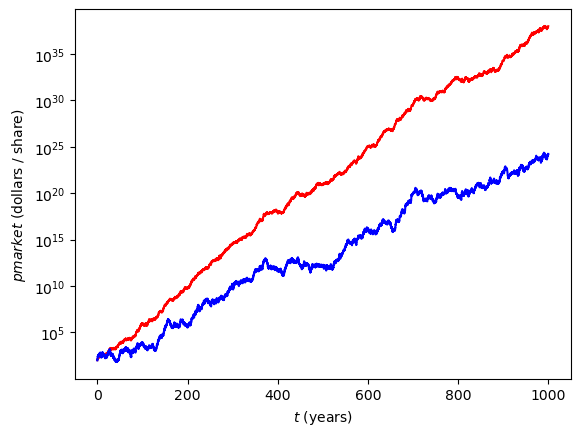

In [7]:

nobs = nyears * obs_per_year
dt = 1.00 / obs_per_year 

rng = np.random.default_rng(seed=seed0)

z_market = rng.standard_normal(nobs)
z_asset = rng.standard_normal(nobs)

logR_market = Elogr_market_true * dt + sigma_market_true * np.sqrt(dt) * z_market
logR_asset =  (Elogr_asset_true * dt 
               + beta_asset_true * sigma_market_true * np.sqrt(dt) * z_market 
               + sigma_asset_idiosyncratic_true * np.sqrt(dt) * z_asset)

R_market = np.exp(logR_market)  # not continuously compounded
R_asset = np.exp(logR_asset)  # not continuously compounded

r_market = R_market - 1.00   # not continuously compounded, not logged
r_asset = R_asset - 1.00  # not continuously compounded, not logged

print(f"The following should be equal, up to sampling error:")
print(f"{r_market.mean() = }, {np.exp(Er_market_true * dt) - 1 =}")
print(f"{r_asset.mean() = }, {np.exp(Er_asset_true * dt) - 1 =}")
print(f"{np.log(R_market).std()=}, {sigma_market_true * np.sqrt(dt)=}")
print(f"{np.log(R_asset).std()=}, {sigma_asset_true * np.sqrt(dt)=}")

p_market = np.hstack([p0_market, R_market]).cumprod()
p_asset = np.hstack([p0_asset, R_asset]).cumprod()
t = (np.ones_like(p_market).cumsum() - 1) * dt

if nobs < 15000:

    plt.plot(t, p_market, 'r-', markersize=1.00)
    plt.plot(t, p_asset, 'b-', markersize=1.00)
    plt.yscale('log')
    plt.xlabel("$t$ (years)")
    plt.ylabel("$pmarket$ (dollars / share)")
    plt.show()



# Exercise for self-study: A Puzzle

In the plot above, the red line is the cumulative return on the market index, and the blue line is the cumulative return on the stock.  The stock has a higher expected return than the index, both because it has a higher "beta" (loading on the index) and because its "alpha" is positive.

Here is the puzzle: Given its higher expected return, why are the realized returns on the stock over 1000 years less than the realized return on the index? (Did I make a mistake? Is there something unusual about the sample path on the stock? Is there a difference between expected returns and internal rate of return?)



Pretend you are given as data `p_market` and `p_asset`.

Regress log of asset excess returns on log of market excess returns:

xlog.shape=(12000, 2), ylog.shape=(12000,)
coeffs=array([-0.00257873,  0.98272394])
coeffs_true=array([-0.00275,  1.     ])

alpha_asset_estimated * dt = coeffs[0] + 0.50 * sigma_asset_idiosyncratic_true**2 * dt =0.0011712700077566298
alpha_asset_true * dt=0.001, beta_asset_true=1.0
residuals=array([91.125984]), sum of squared residuals = ((ylog - yloghat)**2).sum()=91.1259840000952
rank=2 should be 2 since xlog is nonsingular
singular_values=array([109.54521361,   6.26172835])
r2=array([0.29361411]), r2b=0.29361410745155203, r2m1=array([0.70638589])


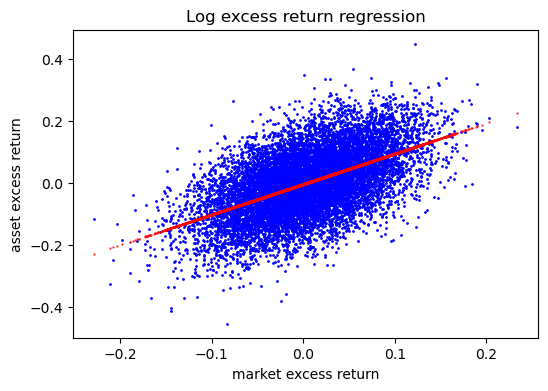

In [8]:
logR_market_excess = np.diff(np.log(p_market)) - rf * dt
logR_asset_excess = np.diff(np.log(p_asset)) - rf * dt

xlog = np.vstack([np.ones_like(logR_market_excess), logR_market_excess]).T
ylog = logR_asset_excess

print(f"{xlog.shape=}, {ylog.shape=}")

coeffs, residuals, rank, singular_values = np.linalg.lstsq(xlog, ylog, rcond=None)
yloghat = xlog @ coeffs
coeffs_true = np.array([(alpha_asset_true - 0.50 * sigma_asset_idiosyncratic_true**2) * dt, 
                        beta_asset_true])

print(f"{coeffs=}")
print(f"{coeffs_true=}\n")
#print(f"alpha_asset_estimated = {coeffs[0] + 0.50 * logR_asset_excess.var()=}")

print(f"alpha_asset_estimated * dt = {coeffs[0] + 0.50 * sigma_asset_idiosyncratic_true**2 * dt =}")
print(f"{alpha_asset_true * dt=}, {beta_asset_true=}")

print(f"{residuals=}, sum of squared residuals = {((ylog - yloghat)**2).sum()=}")
print(f"{rank=} should be 2 since xlog is nonsingular")
print(f"{singular_values=}")

r2m1 = residuals / (ylog*ylog).sum()
r2 = 1.00 - r2m1
r2b = (yloghat*yloghat).sum() / (ylog*ylog).sum()

print(f"{r2=}, {r2b=}, {r2m1=}")

fig = plt.figure(figsize=(6,4))
plt.plot(xlog[:, 1], ylog, 'bo', markersize=1.00)
plt.plot(xlog[:, 1], yloghat, 'ro', markersize=0.50)
plt.title("Log excess return regression")
plt.xlabel("market excess return")
plt.ylabel("asset excess return")
plt.show()

### Exercise for self-study

Repeat the regression analysis in the previous cell using non-logged returns. This is the way it is typically done in empirical asset pricing research.

In [9]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} seconds")


Finished: timestamp = '2024-10-23 11:48:12'
Execution time = 0.38309130002744496 seconds
